In [2]:
import pandas as pd

# examples of 10 policy classification 
policy_examples = [
    {
        "policy": "The Department of Energy announced a $3.5 billion investment in carbon capture and storage infrastructure.",
        "industry": "Energy"
    },
    {
        "policy": "The FDA issued new guidelines to streamline the approval process for AI-powered diagnostic devices.",
        "industry": "Healthcare"
    },
    {
        "policy": "The Department of Transportation unveiled a national plan to expand electric vehicle (EV) charging stations across all major highways.",
        "industry": "Transportation"
    },
    {
        "policy": "The SEC proposed new rules requiring ESG disclosures from publicly traded companies.",
        "industry": "Finance"
    },
    {
        "policy": "The Department of Education launched a grant program to support computer science education in K–12 schools.",
        "industry": "Education"
    },
    {
        "policy": "The USDA introduced subsidies for small-scale farmers adopting regenerative agriculture practices.",
        "industry": "Agriculture"
    },
    {
        "policy": "The FTC launched an antitrust investigation into major online advertising platforms.",
        "industry": "Technology"
    },
    {
        "policy": "The EPA tightened emissions standards for heavy-duty trucks to reduce air pollution.",
        "industry": "Environmental Regulation"
    },
    {
        "policy": "The Department of Commerce provided incentives for domestic semiconductor manufacturing under the CHIPS Act.",
        "industry": "Manufacturing"
    },
    {
        "policy": "The Department of Labor introduced new regulations to protect gig economy workers under federal labor laws.",
        "industry": "Labor & Employment"
    }
]

# turn into dataFrame 
df = pd.DataFrame(policy_examples)
print(df)


                                              policy                  industry
0  The Department of Energy announced a $3.5 bill...                    Energy
1  The FDA issued new guidelines to streamline th...                Healthcare
2  The Department of Transportation unveiled a na...            Transportation
3  The SEC proposed new rules requiring ESG discl...                   Finance
4  The Department of Education launched a grant p...                 Education
5  The USDA introduced subsidies for small-scale ...               Agriculture
6  The FTC launched an antitrust investigation in...                Technology
7  The EPA tightened emissions standards for heav...  Environmental Regulation
8  The Department of Commerce provided incentives...             Manufacturing
9  The Department of Labor introduced new regulat...        Labor & Employment


In [ ]:
!pip install --upgrade openai
from openai import OpenAI

client = OpenAI(api_key="sk-proj-xxxx")
# You can change the API key to your own's

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.68.2
    Uninstalling openai-1.68.2:
      Successfully uninstalled openai-1.68.2


In [ ]:
import time
# Build GPT Prompt
def build_prompt(policy_text):
    prompt = "Please classify the following U.S. policy text into the most relevant industry sector.\n\n"
    for ex in policy_examples:
        prompt += f"Example:\nPolicy: {ex['policy']}\nIndustry: {ex['industry']}\n\n"
    prompt += f"Now classify this policy:\nPolicy: {policy_text}\nIndustry:"
    return prompt

# GPT Classification Function
def classify_policy(policy_text):
    prompt = build_prompt(policy_text)
    try:
        response = client.chat.completions.create(
            model="gpt-4", 
            messages=[{"role": "user", "content": prompt}],
            temperature=0
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error: {e}")
        return "ERROR"


# Unlabeled Policies
policies = [
    "The FAA will increase cybersecurity standards for commercial drones.",
    "The SEC will allow private equity firms more flexibility in ESG disclosures.",
    "The Department of Energy plans to invest in small-scale nuclear reactors.",
    "The Department of Education expands funding for STEM education in rural schools.",
    "The CDC launched a program to improve public health data interoperability across states.",
    "The USDA promotes organic farming through new subsidy programs.",
    "The Department of Transportation funds smart traffic management pilot programs.",
    "The Department of Commerce invests in AI-powered manufacturing facilities.",
    "The EPA updates national air quality standards for ground-level ozone.",
    "The Department of Labor proposes protections for warehouse workers against heat stress."
]

# Build DataFrame and Classify
df = pd.DataFrame(policies, columns=["policy"])
df["predicted_industry"] = df["policy"].apply(classify_policy)

# Save as CSV
df.to_csv("classified_policies.csv", index=False)
print("✅ Classification complete! Results saved to classified_policies.csv")

# Visualization
print(df)

✅ Classification complete! Results saved to classified_policies.csv
                                              policy        predicted_industry
0  The FAA will increase cybersecurity standards ...            Transportation
1  The SEC will allow private equity firms more f...                   Finance
2  The Department of Energy plans to invest in sm...                    Energy
3  The Department of Education expands funding fo...                 Education
4  The CDC launched a program to improve public h...                Healthcare
5  The USDA promotes organic farming through new ...               Agriculture
6  The Department of Transportation funds smart t...            Transportation
7  The Department of Commerce invests in AI-power...             Manufacturing
8  The EPA updates national air quality standards...  Environmental Regulation
9  The Department of Labor proposes protections f...        Labor & Employment


In [ ]:
# Add ground truth
df["true_industry"] = [
    "Transportation",
    "Finance",
    "Energy",
    "Education",
    "Healthcare",
    "Agriculture",
    "Transportation",
    "Manufacturing",
    "Environmental Regulation",
    "Labor & Employment"
]

In [23]:
df["correct"] = (
    df["predicted_industry"].str.strip().str.lower()
    == df["true_industry"].str.strip().str.lower()
)

In [26]:
print(df[["policy", "predicted_industry", "true_industry", "correct"]])

                                              policy  \
0  The FAA will increase cybersecurity standards ...   
1  The SEC will allow private equity firms more f...   
2  The Department of Energy plans to invest in sm...   
3  The Department of Education expands funding fo...   
4  The CDC launched a program to improve public h...   
5  The USDA promotes organic farming through new ...   
6  The Department of Transportation funds smart t...   
7  The Department of Commerce invests in AI-power...   
8  The EPA updates national air quality standards...   
9  The Department of Labor proposes protections f...   

         predicted_industry             true_industry  correct  
0            Transportation            Transportation     True  
1                   Finance                   Finance     True  
2                    Energy                    Energy     True  
3                 Education                 Education     True  
4                Healthcare                Healthcare     

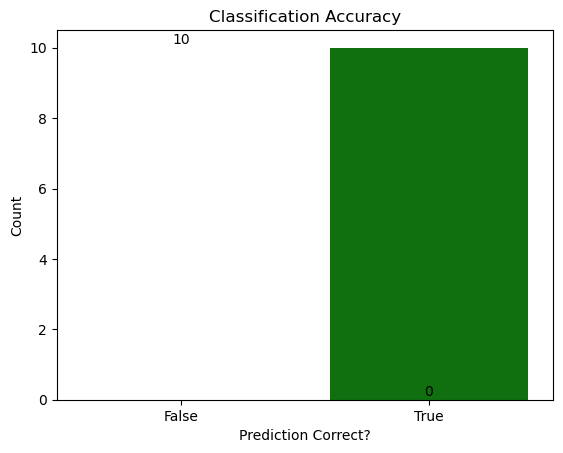

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get value counts and ensure both True/False are represented
correct_counts = df["correct"].astype(int).value_counts().reindex([1, 0], fill_value=0)

# Create the plot with proper hue assignment
sns.barplot(x=correct_counts.index, 
            y=correct_counts.values, 
            hue=correct_counts.index,  # Assign hue to x values
            palette=["red", "green"],
            legend=False)  # Disable legend since we're using direct labels

plt.title("Classification Accuracy")
plt.xticks([0, 1], ["False", "True"])
plt.xlabel("Prediction Correct?")
plt.ylabel("Count")

# Add value labels on top of bars
for i, count in enumerate(correct_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()